In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import datetime as dt

In [2]:
df = pd.read_csv(r'C:\Users\marti\OneDrive\Skrivebord\Skole\ai\oppgave2\nas.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Drop the rows whcih contain a null value
df = df.dropna(how='any', axis=0)

In [4]:
#Drop some colums and convert date so i lateer can be predicted
df.drop(['Open','High','Low','Adj Close','Volume'],axis = 'columns' ,inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [5]:
#Make some training sets and some 'normal' setts
train = df[:600]
valid = df[600:]

x_train = train.drop('Close',axis = 1)
y_train = train['Close']
x_valid = valid.drop('Close',axis=1)
y_valid = valid['Close']

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [6]:
#Make a prediction
pred = reg.predict(x_valid)
print(pred)

[ 44.42116998  44.47530564  44.5294413  ... 329.77024342 329.82437908
 329.87851474]


<ipython-input-7-fc4414b9c59b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


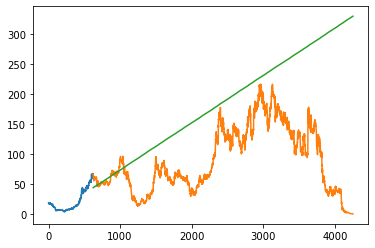

In [7]:
#Insert predictions into valid and plot the data
valid['Predictions'] = pred

valid.index = df[600:].index
train.index = df[:600].index

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [8]:
#print the score
print("Score; ", reg.score(x_train,y_train))

Score;  0.6182706430165096
